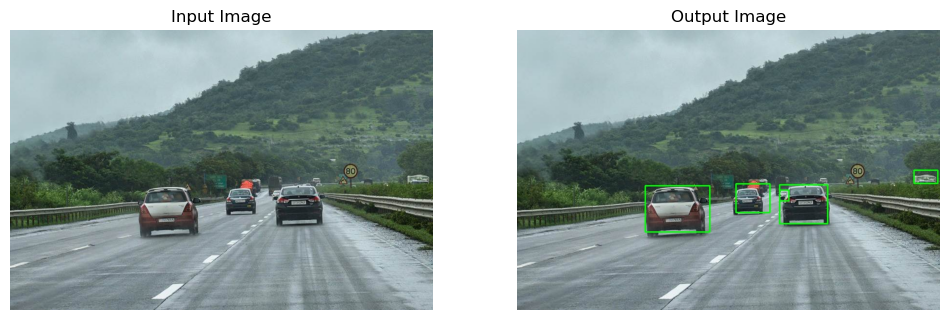

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

CONFIDENCE_THRESHOLD = 0.3
NMS_THRESHOLD = 0.2

KNOWN_DISTANCE = 15.43
VEHICLE_WIDTH = 70
HIGHLIGHT_COLOR = (0, 255, 0)

# Load YOLO model
yoloNet = cv.dnn.readNet('darknetobj.weights', 'darknetobj.cfg')

# Set backend and target for optimization
yoloNet.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA)
yoloNet.setPreferableTarget(cv.dnn.DNN_TARGET_CUDA_FP16)

# Initialize the YOLO detection model
model = cv.dnn_DetectionModel(yoloNet)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

# Load the input image
input_image = cv.imread('dashcam.jpg')

# Detect objects in the image
classes, scores, boxes = model.detect(input_image, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

# Loop through the detected objects and draw bounding boxes
if classes is not None:
    for i in range(len(classes)):
        class_id = int(classes[i])
        box = boxes[i]
        
        class_names = ['car', 'truck', 'animal']
        
        if class_id in [0, 1, 2]:
            object_color = HIGHLIGHT_COLOR
            cv.rectangle(input_image, box, object_color, 2)

# Save the result as an output image
cv.imwrite('output.jpg', input_image)

# Display the input and output images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title("Input Image")
ax1.imshow(cv.cvtColor(cv.imread('dashcam.jpg'), cv.COLOR_BGR2RGB))
ax1.axis('off')

ax2.set_title("Output Image")
ax2.imshow(cv.cvtColor(cv.imread('output.jpg'), cv.COLOR_BGR2RGB))
ax2.axis('off')

plt.show()


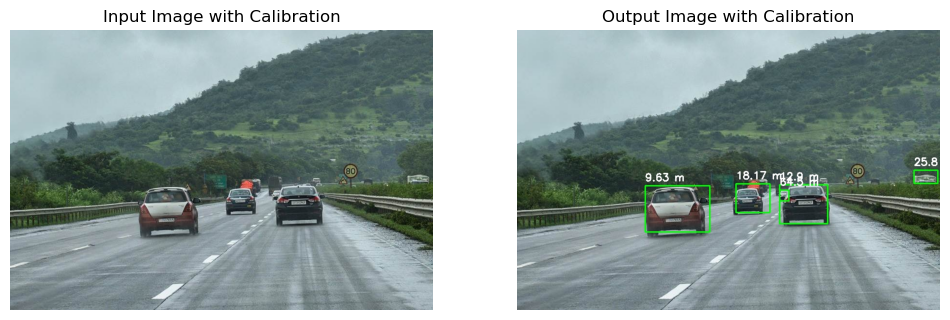

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.1

KNOWN_DISTANCE = 18.43
VEHICLE_WIDTH = 70
HIGHLIGHT_COLOR = (0, 255, 0)

# Load YOLO model
yoloNet = cv.dnn.readNet('darknetobj.weights', 'darknetobj.cfg')

# Set backend and target for optimization
yoloNet.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA)
yoloNet.setPreferableTarget(cv.dnn.DNN_TARGET_CUDA_FP16)

# Initialize the YOLO detection model
model = cv.dnn_DetectionModel(yoloNet)
model.setInputParams(size=(416, 416), scale=1/255, swapRB=True)

# Load the input image
input_image = cv.imread('dashcam.jpg')

# Detect objects in the input image
classes, scores, boxes = model.detect(input_image, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

# Create a copy of the input image for drawing bounding boxes
output_image = input_image.copy()

# Loop through the detected objects
if classes is not None:
    for i in range(len(classes)):
        class_id = int(classes[i])
        box = boxes[i]
        
        class_names = ['car', 'truck', 'animal']
        
        if class_id in [0, 1, 2]:
            object_color = HIGHLIGHT_COLOR
            cv.rectangle(output_image, box, object_color, 2)
            
            # Calculate the distance to the object
            distance = (VEHICLE_WIDTH * KNOWN_DISTANCE) / box[2]
            distance_text = f"{round(distance, 2)} m"
            text_x = box[0]
            text_y = box[1] - 10
            cv.putText(output_image, distance_text, (text_x, text_y), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

# Save the input and output images
cv.imwrite('input_with_calibration.jpg', input_image)
cv.imwrite('output_with_calibration.jpg', output_image)

# Display both images side by side for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title("Input Image with Calibration")
ax1.imshow(cv.cvtColor(cv.imread('input_with_calibration.jpg'), cv.COLOR_BGR2RGB))
ax1.axis('off')

ax2.set_title("Output Image with Calibration")
ax2.imshow(cv.cvtColor(cv.imread('output_with_calibration.jpg'), cv.COLOR_BGR2RGB))
ax2.axis('off')

plt.show()
